# Main objective of this project is to predict the class of diseases using different machine learning algorithm (Logistic Regression, Decision Tree, Random Forest - Boosting Classifier).

# Step_1 : To import all the libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import export_graphviz
from io import StringIO

# Step_2 : Load the Dataset

In [2]:
df = pd.read_excel("/content/drive/MyDrive/dataset/Medical_Diagnosis.xlsx")
df

,colored_sputum,cough,fever,headache,class
0,0.70,1.70,4.10,1.70,cold
1,0.38,3.22,5.20,3.21,cold
2,0.38,1.22,3.70,3.11,cold
3,0.36,3.06,3.19,2.64,cold
4,0.46,3.16,2.79,2.94,cold
...,...,...,...,...,...
1628,6.45,7.22,10.73,3.61,pneumonia
1629,7.05,6.62,8.63,3.71,pneumonia
1630,7.75,7.32,10.83,3.61,pneumonia
1631,7.35,8.52,10.53,3.41,pneumonia


# Data Sanity

In [3]:
'''First step of Data Sanity is to see how many columns and rows dataframe has'''

print(f'The Shape of the DataFrame is : {df.shape}')

print(f'Number of columns are {df.shape[1]}')

print(f'Number of rows are {df.shape[0]}')

The Shape of the DataFrame is : (1633, 5)
Number of columns are 5
Number of rows are 1633


In [4]:
'''Second step is to get basic information about the datasets like the type of dtype'''

print('The basic Information of dataframe is as follows: \n')

df.info()

The basic Information of dataframe is as follows: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   colored_sputum  1631 non-null   float64
 1   cough           1629 non-null   float64
 2   fever           1629 non-null   float64
 3   headache        1630 non-null   float64
 4   class           1633 non-null   object 
dtypes: float64(4), object(1)
memory usage: 63.9+ KB


# Step 3. Exploratory Data Analysis

In [5]:
'''Frist Step is to check the presence of null values'''

print('Total number of missing values are : ')

df.isnull().sum()

Total number of missing values are : 


colored_sputum    2
cough             4
fever             4
headache          3
class             0
dtype: int64

In [6]:
'''Second step is to get statistical information about the datasets '''

print('The basic Information of dataframe is as follows: \n')

df.describe()

The basic Information of dataframe is as follows: 



,colored_sputum,cough,fever,headache
count,1631.000000,1629.000000,1629.000000,1630.000000
mean,4.034408,5.837716,8.200147,5.218669
std,2.629871,2.551540,2.077712,3.232034
min,0.000000,1.000000,1.100000,1.000000
25%,1.670000,3.520000,8.000000,2.492500
50%,2.950000,6.460000,8.740000,3.610000
75%,6.665000,7.780000,9.490000,8.510000
max,8.520000,10.640000,11.240000,11.930000


In [7]:
'''Dropping null values'''

df.dropna(inplace=True)

In [8]:
df.isnull().sum()

colored_sputum    0
cough             0
fever             0
headache          0
class             0
dtype: int64

In [9]:
'''Checking unique value count of variable class'''

df['class'].value_counts()

pneumonia    794
flu          563
cold         263
Name: class, dtype: int64

In [10]:
'''Replacing string dtype into numeric dtype'''

df['class'] = df['class'].map({'pneumonia':0,'flu':1,'cold':2})

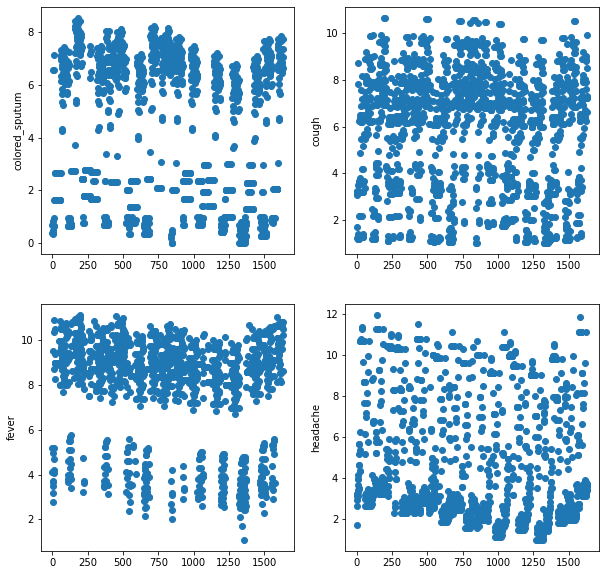

In [11]:
'''Visualization of data:
Purpose is to see the relation between the Feature and Target variable'''

col_names = list(df.columns)

column_index = 0
rows = 2
columns = 2

fig, ax = plt.subplots(ncols=columns, nrows=rows, figsize=(10,10),squeeze=False)

for i in range(rows):
    for j in range(columns):
        ax[i][j].scatter(x = df.index, y = df[col_names[column_index]])
        ax[i][j].set_ylabel(col_names[column_index])
        column_index += 1

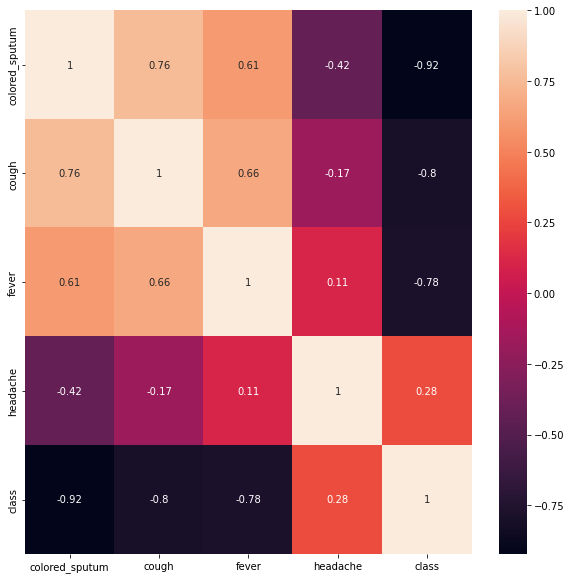

In [12]:
'''Checking correlation of target variable with feature variable'''

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

# Data Visualization.

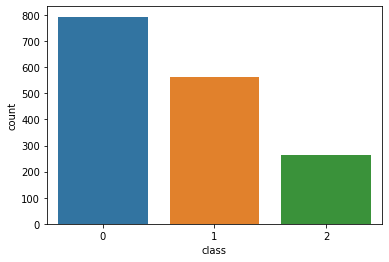

In [13]:
sns.countplot(x = 'class',data = df)

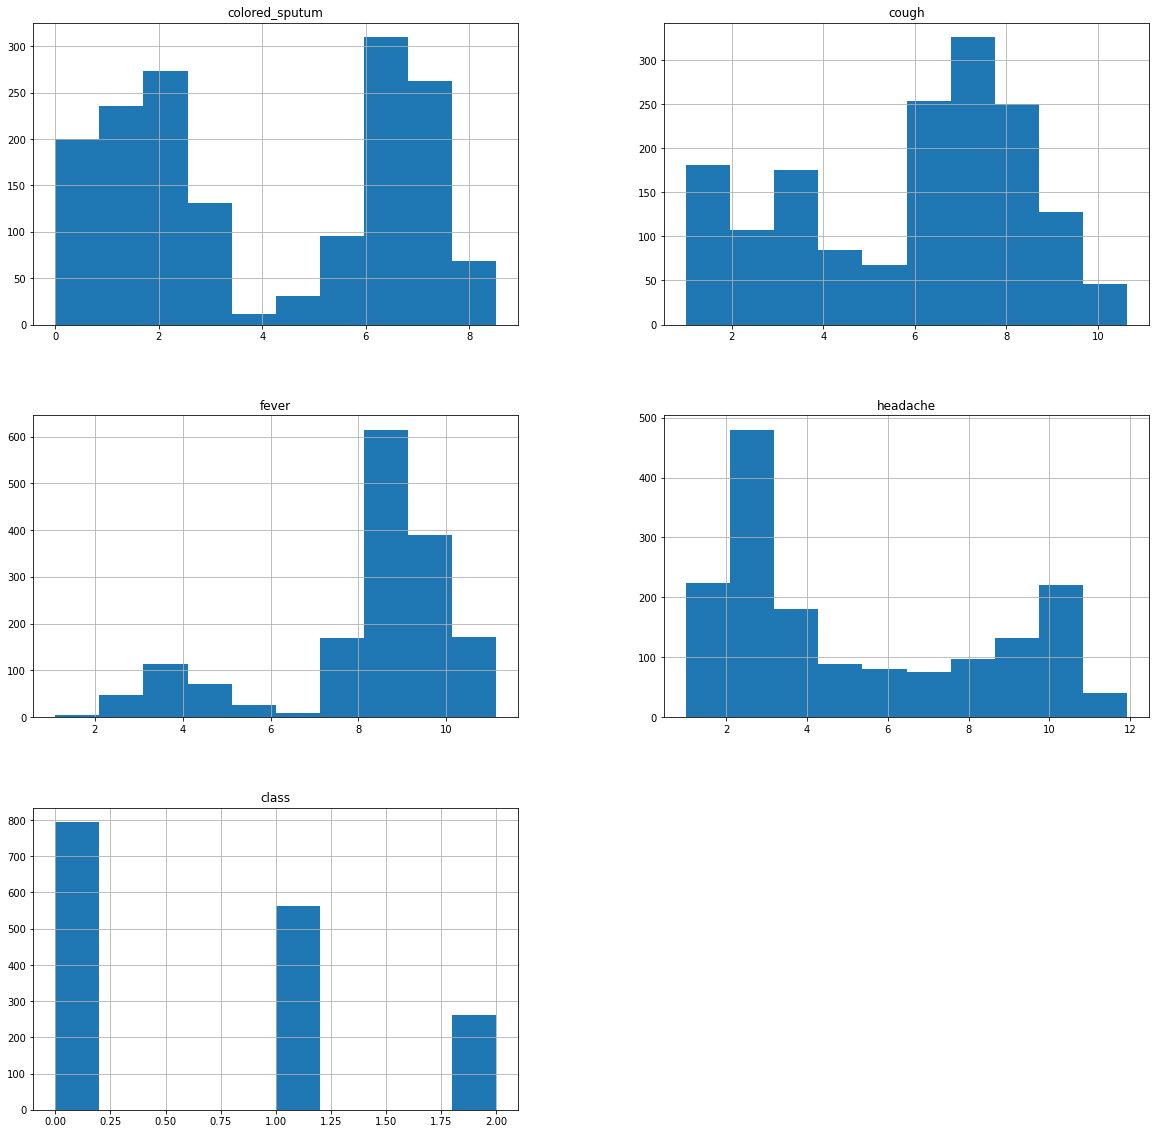

In [14]:
#dist=df.hist(figsize=(15,15))
dist = df.hist(figsize=(20,20))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


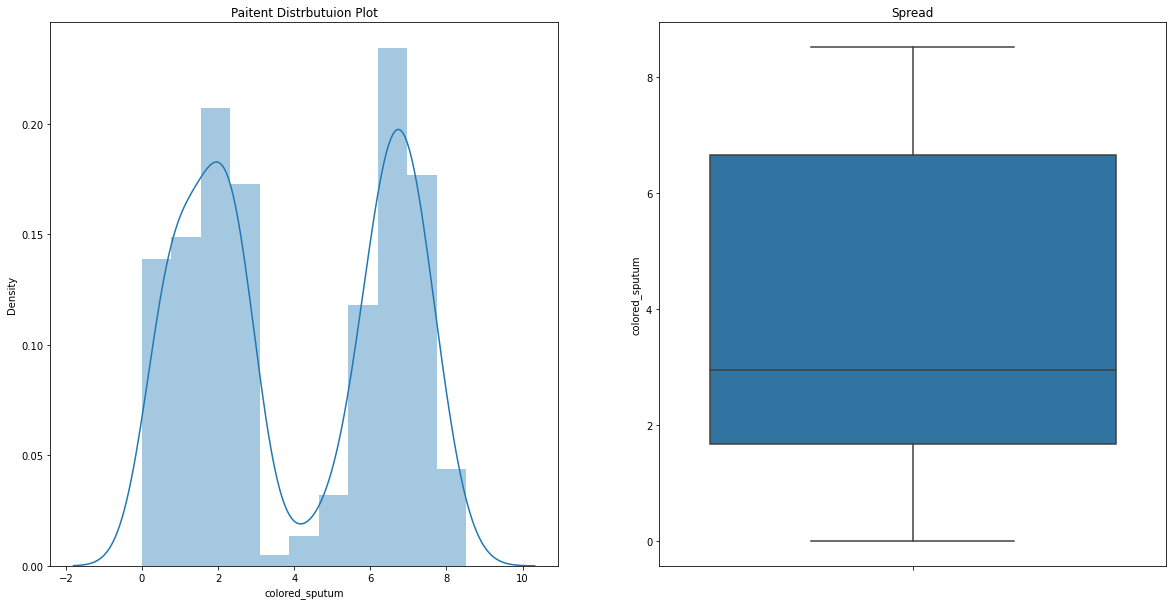

In [15]:
plt.figure(figsize = (20,10))
plt.subplot(121)
plt.title("Paitent Distrbutuion Plot")
sns.distplot(df.colored_sputum)

plt.subplot(122)
plt.title("Spread")
sns.boxplot(y = df.colored_sputum)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


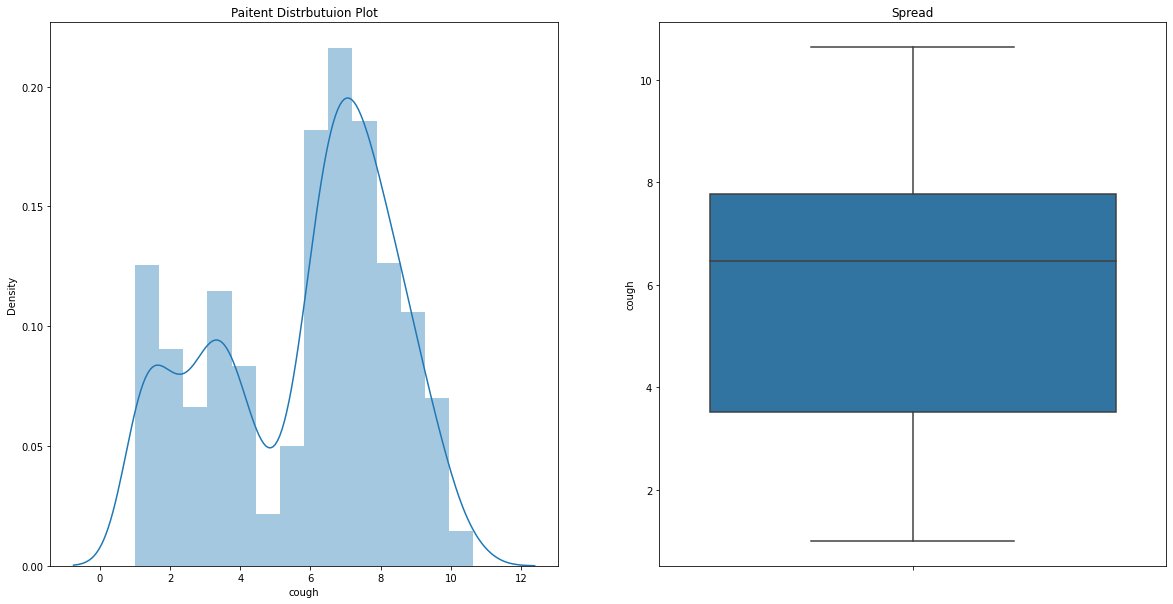

In [16]:
plt.figure(figsize = (20,10))
plt.subplot(121)
plt.title("Paitent Distrbutuion Plot")
sns.distplot(df.cough)

plt.subplot(122)
plt.title("Spread")
sns.boxplot(y = df.cough)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


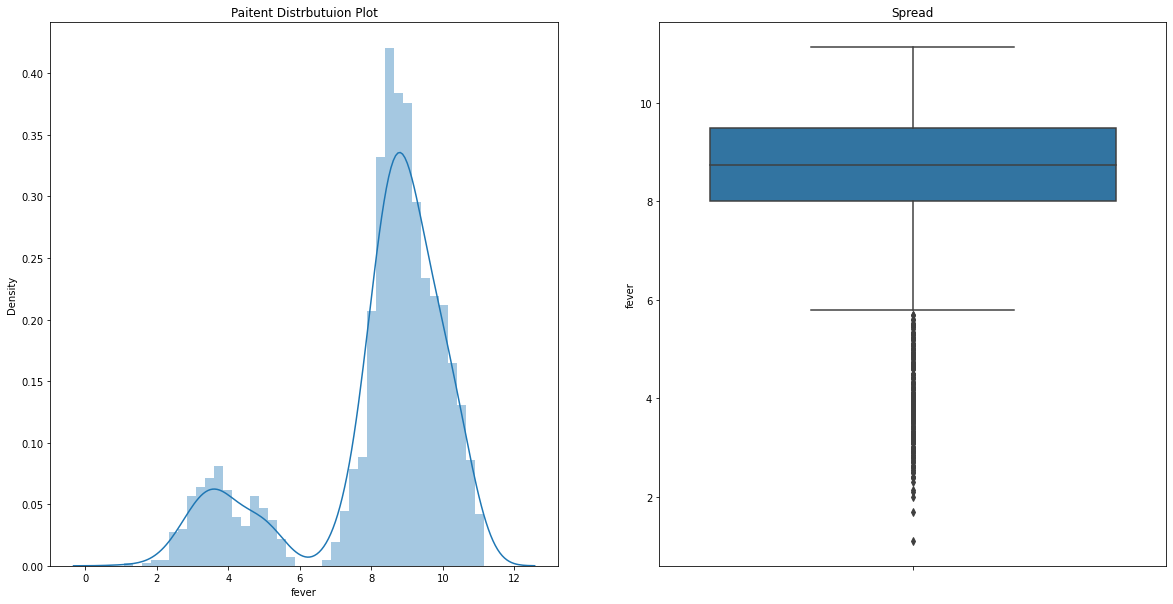

In [17]:
plt.figure(figsize = (20,10))
plt.subplot(121)
plt.title("Paitent Distrbutuion Plot")
sns.distplot(df.fever)

plt.subplot(122)
plt.title("Spread")
sns.boxplot(y = df.fever)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


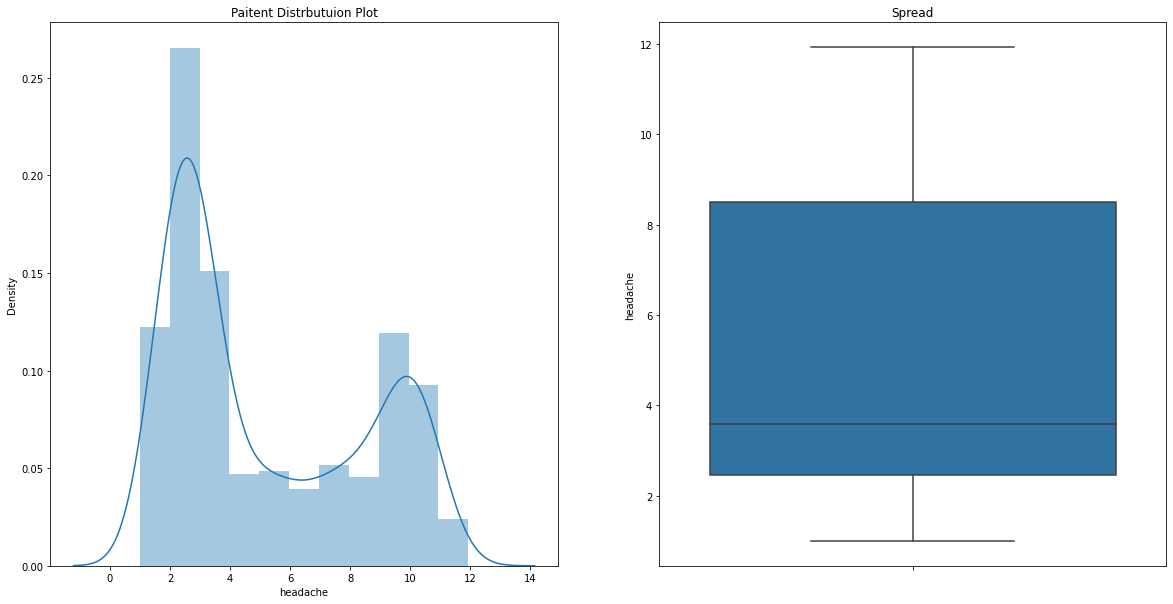

In [18]:
plt.figure(figsize = (20,10))
plt.subplot(121)
plt.title("Paitent Distrbutuion Plot")
sns.distplot(df.headache)

plt.subplot(122)
plt.title("Spread")
sns.boxplot(y = df.headache)
plt.show()

# Extraction X (Independent Variable) and Y (Dependent Variable) varibles.

In [19]:
x = df.drop('class',axis=1)
y = df['class']

# Standaradizing the X variable.

In [20]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Splitting the Variables into training and testing sets.

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=123)

# Train and predict the class usinge different model
First model we will use for predicting the quality of wine is : Logistic Classifier

In [22]:
LogReg = LogisticRegression()
LogReg.fit(xtrain,ytrain)

LogisticRegression()

In [23]:
Y_LogReg_Predicted = LogReg.predict(xtest)
Y_LogReg_Predicted

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 0,
       2, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1,
       2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1, 0,
       2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2,
       0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 2, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 0,
       0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2,

In [24]:
pd.DataFrame({'Actual':ytest,'Predicted':Y_LogReg_Predicted})

,Actual,Predicted
461,0,0
756,1,1
711,0,0
1307,0,0
1403,1,1
...,...,...
1000,0,0
217,1,1
859,1,1
1135,1,1


In [25]:
accuracy_of_LogReg = accuracy_score(Y_LogReg_Predicted,ytest)
accuracy_of_LogReg

0.9979423868312757

In [26]:
LogReg_PredictedProb = LogReg.predict_proba(xtest)[:,1]
fpr,tpr,_ = roc_curve(ytest,LogReg_PredictedProb,pos_label=1)
LogReg_auc = auc(fpr,tpr)
LogReg_auc

1.0

Accuracy of Logistic Regression is : 0.9979423868312757


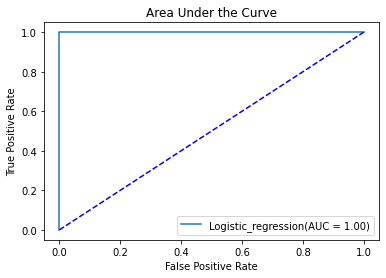

In [27]:
print(f'Accuracy of Logistic Regression is : {accuracy_of_LogReg}')

plt.plot(fpr,tpr,label ='Logistic_regression(AUC = %0.2f)'%LogReg_auc)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Area Under the Curve")
plt.legend()
plt.show()

Confusion Matrix for Logistic Classifier is  :  


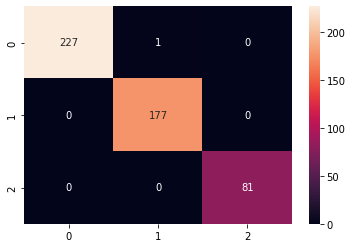

In [28]:
print('Confusion Matrix for Logistic Classifier is  :  ')
cm = confusion_matrix(ytest,Y_LogReg_Predicted)
sns.heatmap(cm,annot=True,fmt='d')

# Second model we will use for predicting the quality of wine is : Decision Tree.

In [29]:
dt_tree1 = DecisionTreeClassifier(random_state=1, max_depth=1, min_samples_split= 4)
dt_tree1.fit(xtrain,ytrain)
dt_tree1_train_score = dt_tree1.score(xtrain,ytrain)
dt_tree1_test_score = dt_tree1.score(xtest,ytest)

print(f'Training Score is : {dt_tree1_train_score}')
print(f'Testing Score is : {dt_tree1_test_score}')

Training Score is : 0.8333333333333334
Testing Score is : 0.8292181069958847


In [30]:
dt_tree2 = DecisionTreeClassifier(random_state=1, max_depth=2, min_samples_split= 4)
dt_tree2.fit(xtrain,ytrain)
dt_tree2_train_score = dt_tree2.score(xtrain,ytrain)
dt_tree2_test_score = dt_tree2.score(xtest,ytest)

print(f'Training Score is : {dt_tree2_train_score}')
print(f'Testing Score is : {dt_tree2_test_score}')

Training Score is : 0.9938271604938271
Testing Score is : 0.9958847736625515


In [31]:
dt_tree3 = DecisionTreeClassifier(random_state=1, max_depth=3, min_samples_split= 4)
dt_tree3.fit(xtrain,ytrain)
dt_tree3_train_score = dt_tree3.score(xtrain,ytrain)
dt_tree3_test_score = dt_tree3.score(xtest,ytest)

print(f'Training Score is : {dt_tree3_train_score}')
print(f'Testing Score is : {dt_tree3_test_score}')

Training Score is : 1.0
Testing Score is : 1.0


Decision Tree Graphically Visualization of dt_tree6 : 


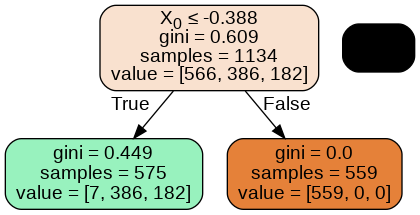

<Figure size 720x576 with 0 Axes>

In [32]:
print('Decision Tree Graphically Visualization of dt_tree6 : ')

from IPython.display import Image 
import pydotplus

plt.figure(figsize=(10,8))
dot_data = StringIO()
export_graphviz(dt_tree1,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Decision Tree Graphically Visualization of dt_tree6 : 


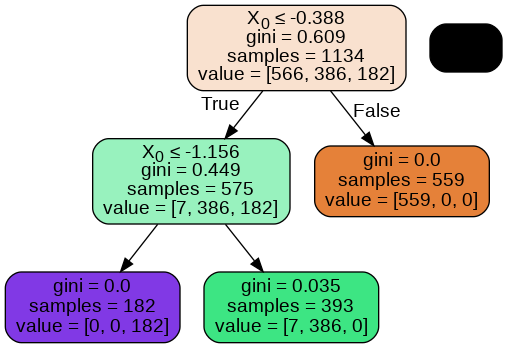

<Figure size 720x576 with 0 Axes>

In [33]:
print('Decision Tree Graphically Visualization of dt_tree6 : ')

from IPython.display import Image 
import pydotplus

plt.figure(figsize=(10,8))
dot_data = StringIO()
export_graphviz(dt_tree2,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Decision Tree Graphically Visualization of dt_tree6 : 


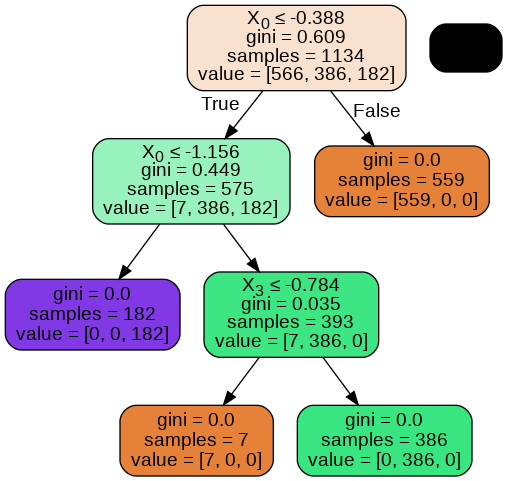

<Figure size 720x576 with 0 Axes>

In [34]:
print('Decision Tree Graphically Visualization of dt_tree6 : ')

from IPython.display import Image 
import pydotplus

plt.figure(figsize=(10,8))
dot_data = StringIO()
export_graphviz(dt_tree3,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [35]:
dt_tree2_predicted = dt_tree2.predict(xtest)
dt_tree2_predicted

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 0,
       2, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1,
       2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1, 0,
       2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2,
       0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 2, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 0,
       0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2,

In [36]:
pd.DataFrame({'Actual':dt_tree2_predicted,'Predicted':ytest})

,Actual,Predicted
461,0,0
756,1,1
711,0,0
1307,0,0
1403,1,1
...,...,...
1000,0,0
217,1,1
859,1,1
1135,1,1


In [37]:
dt_tree2_accuracy = accuracy_score(dt_tree2_predicted,ytest)
dt_tree2_accuracy

0.9958847736625515

In [38]:
dt_tree2_predictedprob = dt_tree2.predict_proba(xtest)[:,1]
fpr,tpr,_ = roc_curve(ytest,dt_tree2_predictedprob,pos_label=1)
dt_tree2_auc = auc(fpr,tpr)
dt_tree2_auc

0.9967637540453074

Accuracy of Decision_tree is : 0.9958847736625515


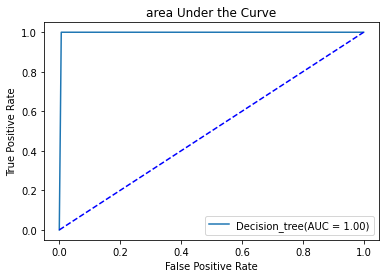

In [39]:
print(f'Accuracy of Decision_tree is : {dt_tree2_accuracy}')

plt.plot(fpr,tpr,label ='Decision_tree(AUC = %0.2f)'%dt_tree2_auc)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
plt.legend()
plt.show()

# Third model we will use for predicting the quality of wine is : Random Forest (Boosting Classifier).

In [40]:
clf = AdaBoostClassifier(random_state=23, n_estimators= 500, learning_rate=0.01)
clf.fit(xtrain,ytrain)

AdaBoostClassifier(learning_rate=0.01, n_estimators=500, random_state=23)

In [41]:
clf_train_score = clf.score(xtrain,ytrain)
clf_test_score = clf.score(xtest,ytest)

print(f'Training Score is : {clf_train_score}')
print(f'Testing Score is : {clf_test_score}')

Training Score is : 1.0
Testing Score is : 1.0


In [42]:
clf_predicted = clf.predict(xtest)
clf_predicted

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 0,
       2, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1,
       2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1, 0,
       2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2,
       0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 2, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 0,
       0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2,

In [43]:
pd.DataFrame({'Actual':ytest,'Predicted':clf_predicted})

,Actual,Predicted
461,0,0
756,1,1
711,0,0
1307,0,0
1403,1,1
...,...,...
1000,0,0
217,1,1
859,1,1
1135,1,1


In [44]:
clf_accuracy = accuracy_score(clf_predicted,ytest)
clf_accuracy

1.0

In [45]:
clf_predictedprob = clf.predict_proba(xtest)[:,1]
fpr,tpr,_ = roc_curve(ytest,clf_predictedprob,pos_label=1)
clf_auc = auc(fpr,tpr)
clf_auc

1.0

Accuracy of Boosting Classifier is : 1.0


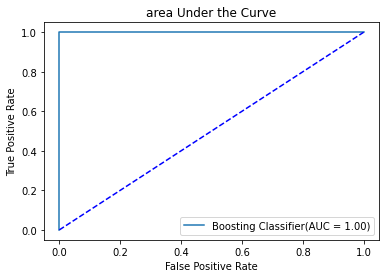

In [46]:
print(f'Accuracy of Boosting Classifier is : {clf_accuracy}')

plt.plot(fpr,tpr,label ='Boosting Classifier(AUC = %0.2f)'%clf_auc)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
plt.legend()
plt.show()

# Classification Report of Logistic Regression , Decision Tree, Boosting Clsssifier.

In [47]:
print('1. Classification Report of Logistic Regression \n')
print(classification_report(ytest,Y_LogReg_Predicted))

1. Classification Report of Logistic Regression 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       0.99      1.00      1.00       177
           2       1.00      1.00      1.00        81

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486



In [48]:
print('2. Classification Report for Decision Tree \n')
print(classification_report(ytest,dt_tree2_predicted))

2. Classification Report for Decision Tree 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       228
           1       0.99      1.00      0.99       177
           2       1.00      1.00      1.00        81

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486



In [49]:
print('3. Classification Report for Boosting Classifier \n')
print(classification_report(ytest,clf_predicted))

3. Classification Report for Boosting Classifier 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       1.00      1.00      1.00       177
           2       1.00      1.00      1.00        81

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486

